# **Classification Model - PubChem**




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_dataset_PubChem.csv')

In [ ]:
import numpy as np
df = df[np.isfinite(df).all(1)]
df = df.reset_index(drop=True)

In [ ]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [ ]:
bioactivity_threshold = []
for i in df.pIC50:
  if float(i) <= 5.0:
    bioactivity_threshold.append("Inactive") #inactive
  elif float(i) >= 6.0:
    bioactivity_threshold.append("Active") #active
  else:
    bioactivity_threshold.append("Intermediate") #intermediate

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='Bio_class')
df = pd.concat([df, bioactivity_class], axis=1)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,Bio_class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.124939,Active
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7.000000,Active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.301030,Inactive
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.522879,Active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.096910,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,8.590067,Active
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,8.621602,Active
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9.387216,Active
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9.200659,Active


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


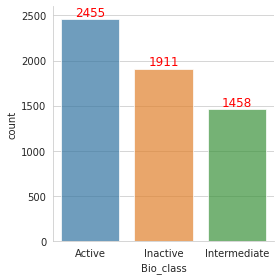

In [ ]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.factorplot('Bio_class', data=df, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['Bio_class'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')


In [ ]:
X = df.drop(['pIC50','Bio_class'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.Bio_class
Y

0         Active
1         Active
2       Inactive
3         Active
4         Active
          ...   
5819      Active
5820      Active
5821      Active
5822      Active
5823      Active
Name: Bio_class, Length: 5824, dtype: object

In [ ]:
X.shape

(5824, 881)

In [ ]:
Y.shape

(5824,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,1,1,0,0,1,...,1,0,1,0,1,1,1,0,1,0
5820,1,1,0,1,1,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5821,1,1,0,1,1,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5822,1,1,1,1,1,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
Ly.fit_transform(Y)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Ly.classes_

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((4659, 221), (4659,))

In [ ]:
X_test.shape, Y_test.shape

((1165, 221), (1165,))

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1
!pip install PyYAML==5.3.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 13.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 22.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf7d75fc56d7c89ba909aadb4d153148f686012fea0c2ac5c697959bc83d2666
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 29/29 [00:25<00:00,  1.12it/s]


In [ ]:
# Performance table of the training set (80% subset)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.97,0.97,None,0.97,0.48
DecisionTreeClassifier,0.97,0.96,None,0.97,0.09
ExtraTreeClassifier,0.97,0.96,None,0.97,0.08
ExtraTreesClassifier,0.97,0.96,None,0.97,0.86
LabelPropagation,0.97,0.96,None,0.97,0.25
LabelSpreading,0.97,0.96,None,0.97,0.37
BaggingClassifier,0.95,0.95,None,0.95,0.45
LGBMClassifier,0.95,0.95,None,0.95,0.98
NuSVC,0.88,0.87,None,0.88,0.49


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:15<00:00,  1.91it/s]


In [ ]:
# Performance table of the test set (20% subset)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.73,0.72,None,0.73,0.93
ExtraTreesClassifier,0.73,0.71,None,0.73,0.46
RandomForestClassifier,0.72,0.70,None,0.72,0.49
BaggingClassifier,0.71,0.69,None,0.71,0.24
NuSVC,0.71,0.69,None,0.71,0.45
DecisionTreeClassifier,0.70,0.69,None,0.70,0.08
ExtraTreeClassifier,0.67,0.65,None,0.67,0.04
SVC,0.67,0.64,None,0.66,0.41
LabelPropagation,0.67,0.63,None,0.65,0.16
